In [2]:
import tensorflow_datasets as tfds

In [3]:
(train, test), info = tfds.load("tf_flowers", split=["train[:80%]", "train[80%:]"], with_info=True, as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\isaka\tensorflow_datasets\tf_flowers\incomplete.ZZ69DI_3.0.1\tf_flowers-train.tfrecord*...:…

Dataset tf_flowers downloaded and prepared to C:\Users\isaka\tensorflow_datasets\tf_flowers\3.0.1. Subsequent calls will reuse this data.


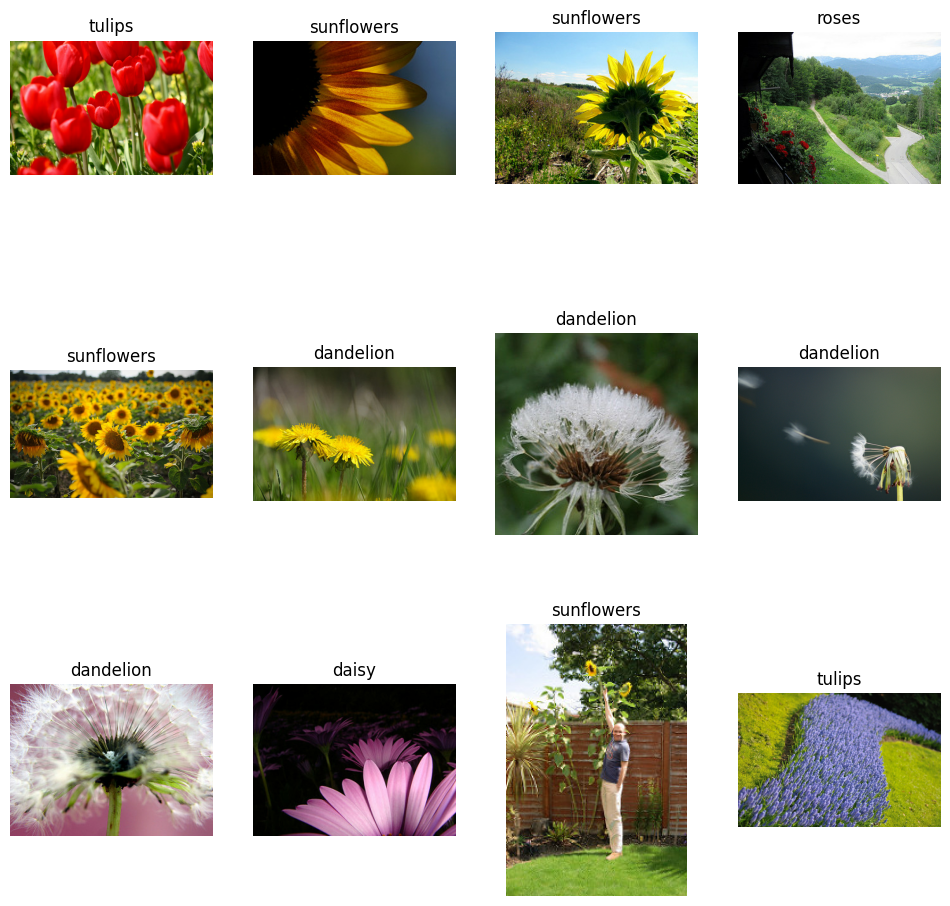

In [21]:
import matplotlib.pyplot as plt

label_names = info.features["label"].names
fig, axes = plt.subplots(3, 4, figsize=(12, 12))

for i, img_sample in enumerate(train.take(12)):
    # print(f"img_sample: {img_sample}, label: {img_sample[1]}")
    ax = axes.flatten()[i]
    ax.imshow(img_sample[0])
    ax.axis("off")
    ax.set_title(label_names[img_sample[1].numpy()])
    

In [22]:
import tensorflow as tf

In [24]:
def preprocess_img(image, label, img_shape=(120, 120)):
    image = tf.image.resize(image, img_shape) / 255.0
    return image, label

In [ ]:
input_shape = (120, 120, 3)
batch_size = 32

train_batch = train.shuffle(600).map(preprocess_img).batch(batch_size).prefetch(1)
test_batch = test.map(preprocess_img).batch(batch_size).prefetch(1)


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 120, 120, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [29]:
import keras
from keras.applications import Xception

feature_extractor = Xception(include_top=False, input_shape=input_shape, weights="imagenet")

model = keras.models.Sequential([
    feature_extractor,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(256, activation="relu", kernel_initializer="he_normal"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5, activation="softmax")
])

for layer in feature_extractor.layers:
    layer.trainable = False
    
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 4, 4, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,387,309 (81.59 MB)

 Trainable params: 525,829 (2.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [30]:
model.fit(train_batch, epochs=20, validation_data=test_batch)

Epoch 1/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 51s 513ms/step - accuracy: 0.5378 - loss: 1.2530 - val_accuracy: 0.8038 - val_loss: 0.5638
Epoch 2/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 54s 592ms/step - accuracy: 0.7621 - loss: 0.6731 - val_accuracy: 0.8256 - val_loss: 0.5159
Epoch 3/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 60s 649ms/step - accuracy: 0.7893 - loss: 0.5720 - val_accuracy: 0.8229 - val_loss: 0.5128
Epoch 4/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 59s 645ms/step - accuracy: 0.8067 - loss: 0.5231 - val_accuracy: 0.8379 - val_loss: 0.4868
Epoch 5/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 59s 637ms/step - accuracy: 0.8176 - loss: 0.5048 - val_accuracy: 0.8406 - val_loss: 0.4662
Epoch 6/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 58s 632ms/step - accuracy: 0.8284 - loss: 0.4835 - val_accuracy: 0.8501 - val_loss: 0.4505
Epoch 7/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 59s 640ms/step - accuracy: 0.8626 - loss: 0.4054 - val_accuracy: 0.8338 - val_loss: 0.4543
Epoch 8/20
92/92 ━━━━━━━━━━━━━━━━━━━━ 58s 632ms/step - accuracy: 0.8647 - loss: 0.3817 - val_accu

<Axes: >

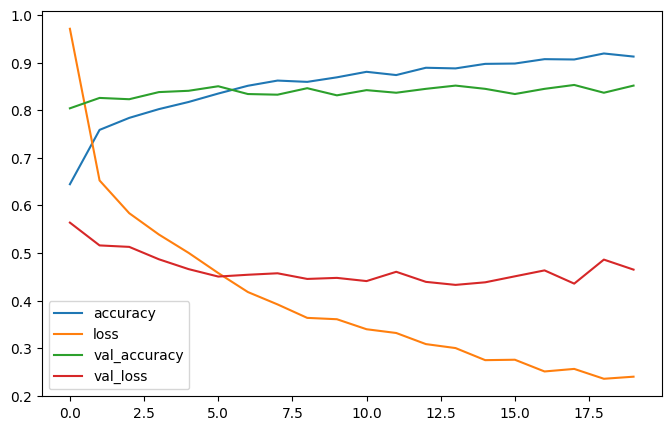

In [31]:
import pandas as pd

pd.DataFrame(model.history.history).plot(figsize=(8, 5))